Import thư viện

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#content/drive/My Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Load và xử lí dữ liệu

In [ ]:
sheets_dict = pd.read_excel('/content/drive/My Drive/DL/data_tk1/THONGKESVISHOCTUCHON.xlsx', sheet_name=['DSTK', 'DS môn TC', 'DS co Diem', 'Dulieu0205'])

In [ ]:
#đọc và làm sách dữ liệu


In [ ]:
df_DSTK = sheets_dict['DSTK']
df_DS_mon_TC = sheets_dict['DS môn TC']
df_DS_co_Diem = sheets_dict['DS co Diem']
df_Dulieu0205 = sheets_dict['Dulieu0205']

df_DSTK.columns = df_DSTK.iloc[0]
df_DSTK = df_DSTK[1:]

df_DS_mon_TC.columns = df_DS_mon_TC.iloc[0]
df_DS_mon_TC = df_DS_mon_TC[1:]


In [ ]:
df_DSTK = df_DSTK.dropna(how='all')
df_DS_mon_TC = df_DS_mon_TC.dropna(how='all')
df_DS_co_Diem = df_DS_co_Diem.dropna(how='all')
df_Dulieu0205 = df_Dulieu0205.dropna(how='all')

In [ ]:
df_DS_mon_TC.head()

,HK,Mã môn,Tên Môn,HK,Thuoc KCNTT
1,2,003240,Hàm phức và phép biến đổi Laplace,2,0
2,2,003395,Logic học,2,0
3,2,003320,Phương pháp tính,2,0
4,2,003193,Toán ứng dụng,2,0
5,2,003345,Vật lý đại cương,2,0


EDA

In [ ]:
df_Dulieu0205.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GioiTinh     4670 non-null   int64  
 1   IDLopHoc     4670 non-null   int64  
 2   IDSinhVien   4670 non-null   int64  
 3   MaMonHoc     4670 non-null   int64  
 4   TenDot       4670 non-null   object 
 5   DiemTongKet  4015 non-null   float64
 6   Thuộc KCNTT  4670 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 255.5+ KB


In [ ]:
df_Dulieu0205.describe()

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,DiemTongKet,Thuộc KCNTT
count,4670.000000,4670.000000,4.670000e+03,4670.000000,4015.000000,4670.000000
mean,0.233619,26493.484154,1.704986e+06,2791.690364,7.110037,0.354818
std,0.423178,367.124262,1.323973e+04,1501.844080,1.835561,0.478509
min,0.000000,25933.000000,1.677250e+06,901.000000,0.000000,0.000000
25%,0.000000,26153.000000,1.695106e+06,1366.000000,6.600000,0.000000
50%,0.000000,26421.000000,1.704675e+06,3206.000000,7.400000,0.000000
75%,0.000000,26961.000000,1.713225e+06,3395.000000,8.200000,1.000000
max,1.000000,27277.000000,1.737233e+06,10665.000000,10.000000,1.000000


In [ ]:
df_Dulieu0205.columns

Index(['GioiTinh', 'IDLopHoc', 'IDSinhVien', 'MaMonHoc', 'TenDot',
       'DiemTongKet', 'Thuộc KCNTT'],
      dtype='object')

In [ ]:
df_Dulieu0205['IDLopHoc'].unique()

array([25933, 26150, 26156, 26153, 26420, 26422, 26421, 26961, 26965,
       27082, 27277])

In [ ]:
print("Số sinh viên:", df_Dulieu0205['IDSinhVien'].unique().shape[0])

Số sinh viên: 591


In [ ]:
#trích xuất các mẫu cụ thể từ cột TenDot:
#r'(HK\d)'trích xuất học kỳ (ví dụ: "HK1").
#r'(\d{4}-\d{4})'trích xuất năm học (ví dụ, "2023-2024").


In [ ]:
df_Dulieu0205['HocKy'] = df_Dulieu0205['TenDot'].str.extract(r'(HK\d)')
df_Dulieu0205['NamHoc'] = df_Dulieu0205['TenDot'].str.extract(r'(\d{4}-\d{4})')

In [ ]:
df_Dulieu0205.head()

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,TenDot,DiemTongKet,Thuộc KCNTT,HocKy,NamHoc
0,1,25933,1677250,3197,HK1 (2019-2020),8.0,0,HK1,2019-2020
1,1,25933,1677250,3203,HK2 (2019-2020),7.6,0,HK2,2019-2020
2,1,25933,1677250,3395,HK1 (2020-2021),8.9,0,HK1,2020-2021
3,1,25933,1677250,1076,HK1 (2020-2021),7.9,1,HK1,2020-2021
4,1,25933,1677250,901,HK1 (2020-2021),9.5,1,HK1,2020-2021


In [ ]:
df_Dulieu0205['DiemTongKet'].fillna(-1, inplace=True)

In [ ]:
df_Dulieu0205.isnull().sum()

,0
GioiTinh,0
IDLopHoc,0
IDSinhVien,0
MaMonHoc,0
TenDot,0
DiemTongKet,0
Thuộc KCNTT,0
HocKy,0
NamHoc,0


In [ ]:
print("Số môn thuộc khoa CNTT: ", len(df_DS_mon_TC[df_DS_mon_TC['Thuoc KCNTT'] == 1]))
print("Số môn không thuộc khoa CNTT: ", len(df_DS_mon_TC[df_DS_mon_TC['Thuoc KCNTT'] == 0]))

# print("Các môn thuộc khoa CNTT: ", df_DS_mon_TC[df_DS_mon_TC['Thuoc KCNTT'] == 1]['Tên Môn'].values)
# print("Các môn không thuộc khoa CNTT: ", df_DS_mon_TC[df_DS_mon_TC['Thuoc KCNTT'] == 0]['Tên Môn'].values)

Số môn thuộc khoa CNTT:  11
Số môn không thuộc khoa CNTT:  27


In [ ]:
df_DS_mon_TC.rename(columns={'Mã môn': 'MaMonHoc'}, inplace=True)

In [ ]:
print("Trung bình điểm của các lớp học phần: \n", df_Dulieu0205.groupby('IDLopHoc')['DiemTongKet'].mean())

Trung bình điểm của các lớp học phần: 
 IDLopHoc
25933    6.515894
26150    7.045679
26153    6.652917
26156    6.833648
26420    6.260172
26421    5.708517
26422    5.573649
26961    4.920974
26965    5.358526
27082    5.851031
27277    5.423718
Name: DiemTongKet, dtype: float64


In [ ]:
print("Trung bình điểm của các môn học: \n", df_Dulieu0205.groupby('MaMonHoc')['DiemTongKet'].mean().sort_values(ascending=False))

Trung bình điểm của các môn học: 
 MaMonHoc
3240     9.000000
3285     7.942857
3345     7.878947
3206     7.778947
3195     7.625000
3196     7.507619
3395     7.490345
3320     7.489256
3197     7.381818
3194     7.200000
3193     7.000000
10665    6.964583
3325     6.840541
2330     6.807627
3217     6.681481
3245     6.666343
3203     6.581481
4032     6.458333
1076     6.401357
2031     6.379138
3205     6.340625
3893     6.056250
901      5.870000
1295     5.329831
3591     5.306576
3758     4.771429
3443     4.758242
3453     4.332609
1276     4.145802
2296     3.576389
3894     2.642857
3454     2.000000
1366     1.673529
2329     0.838636
Name: DiemTongKet, dtype: float64


Vizualize

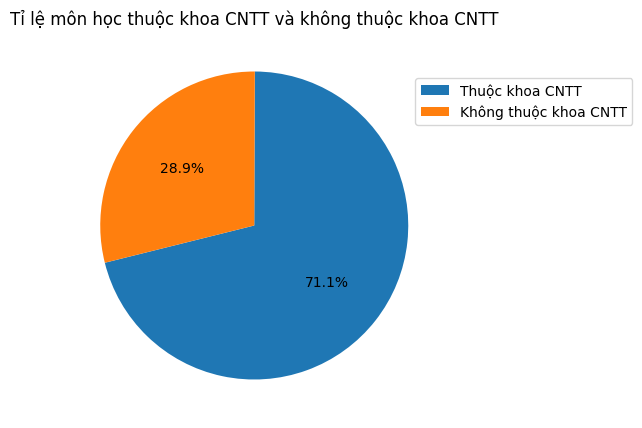

In [ ]:
plt.figure(figsize=(10, 5))
labels=['Thuộc khoa CNTT', 'Không thuộc khoa CNTT']
plt.pie(df_DS_mon_TC['Thuoc KCNTT'].value_counts(), autopct='%1.1f%%', startangle=194)
plt.title('Tỉ lệ môn học thuộc khoa CNTT và không thuộc khoa CNTT')
plt.legend(labels, loc=1, bbox_to_anchor=(1.5, 0.9))
plt.show()

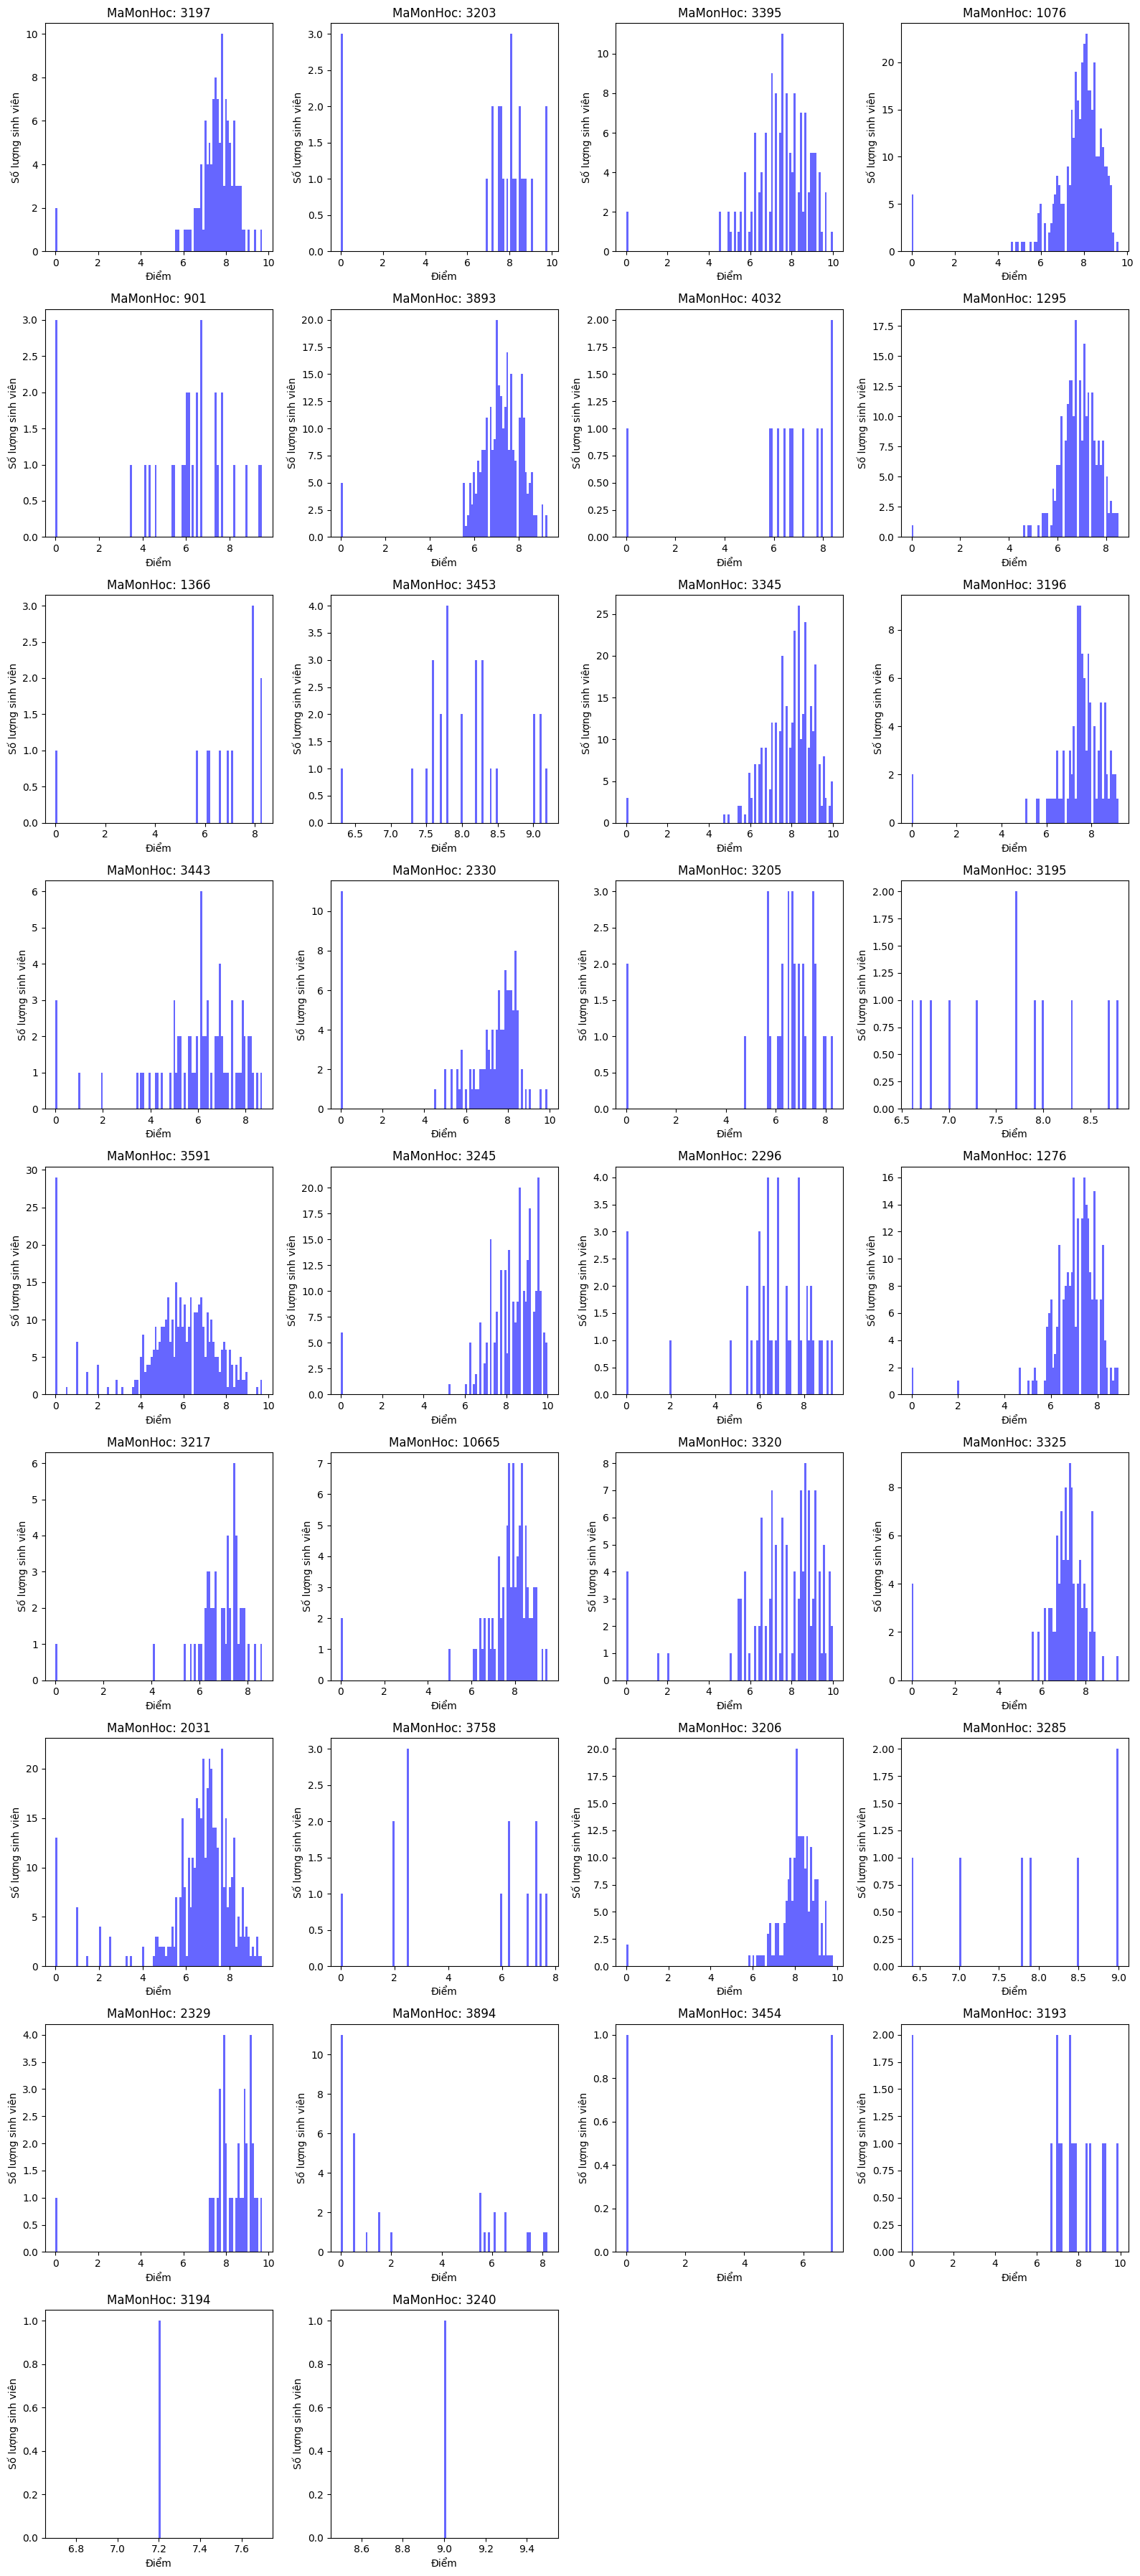

In [ ]:
df_valid_scores = df_Dulieu0205[(df_Dulieu0205['DiemTongKet'] >= 0) & (df_Dulieu0205['DiemTongKet'] <= 10)]

ma_mon_hocs = df_valid_scores['MaMonHoc'].unique()

num_cols = 4
num_rows = (len(ma_mon_hocs) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

for i, ma_mon in enumerate(ma_mon_hocs):
    ax = axes[i // num_cols, i % num_cols]
    group = df_valid_scores[df_valid_scores['MaMonHoc'] == ma_mon]
    ax.hist(group['DiemTongKet'], bins=100, alpha=0.6, color='blue')
    ax.set_title(f'MaMonHoc: {ma_mon}')
    ax.set_xlabel('Điểm')
    ax.set_ylabel('Số lượng sinh viên')

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

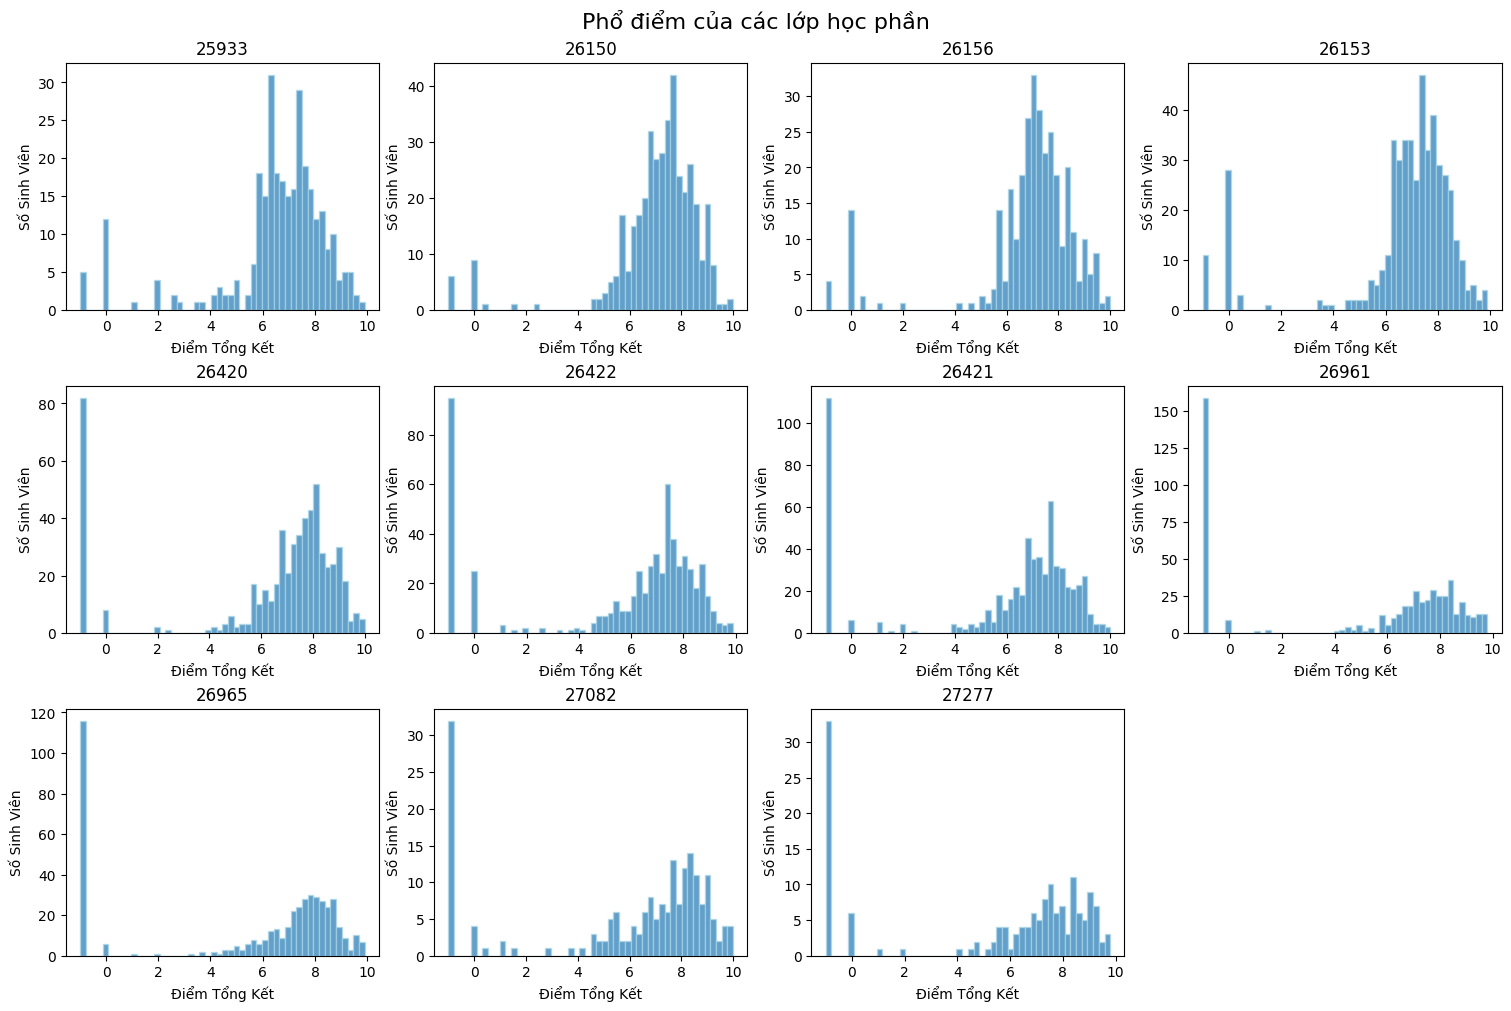

In [ ]:
classes = df_Dulieu0205['IDLopHoc'].unique()

ncols = 4
nrows = (len(classes) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), constrained_layout=True)

axes = axes.flatten()

for ax, cls in zip(axes, classes):
    subset = df_Dulieu0205[df_Dulieu0205['IDLopHoc'] == cls]
    ax.hist(subset['DiemTongKet'], bins=50, alpha=0.7, label=cls, edgecolor='lightblue')
    ax.set_title(cls)
    ax.set_xlabel('Điểm Tổng Kết')
    ax.set_ylabel('Số Sinh Viên')

for ax in axes[len(classes):]:
    ax.axis('off')

plt.suptitle('Phổ điểm của các lớp học phần', fontsize=16)
plt.show()

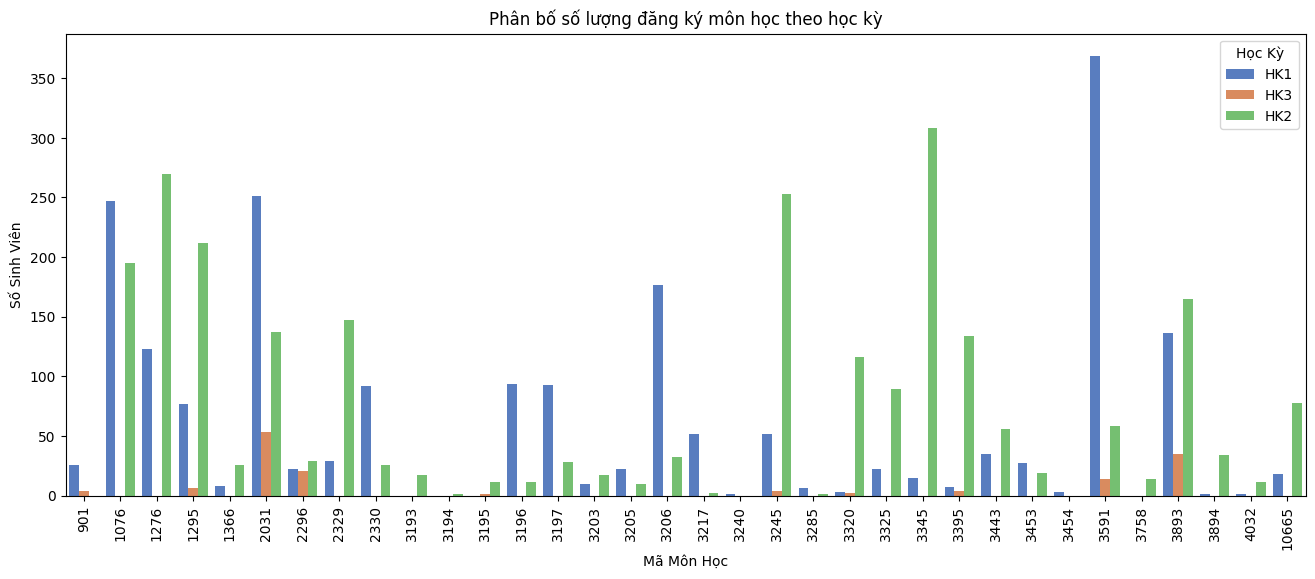

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_Dulieu0205, x='MaMonHoc', hue='HocKy', palette='muted')
plt.xticks(rotation=90)
plt.xlabel('Mã Môn Học')
plt.ylabel('Số Sinh Viên')
plt.title('Phân bố số lượng đăng ký môn học theo học kỳ')
plt.legend(title='Học Kỳ')
plt.show()

In [ ]:
df_Dulieu0205.head()

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,TenDot,DiemTongKet,Thuộc KCNTT,HocKy,NamHoc
0,1,25933,1677250,3197,HK1 (2019-2020),8.0,0,HK1,2019-2020
1,1,25933,1677250,3203,HK2 (2019-2020),7.6,0,HK2,2019-2020
2,1,25933,1677250,3395,HK1 (2020-2021),8.9,0,HK1,2020-2021
3,1,25933,1677250,1076,HK1 (2020-2021),7.9,1,HK1,2020-2021
4,1,25933,1677250,901,HK1 (2020-2021),9.5,1,HK1,2020-2021


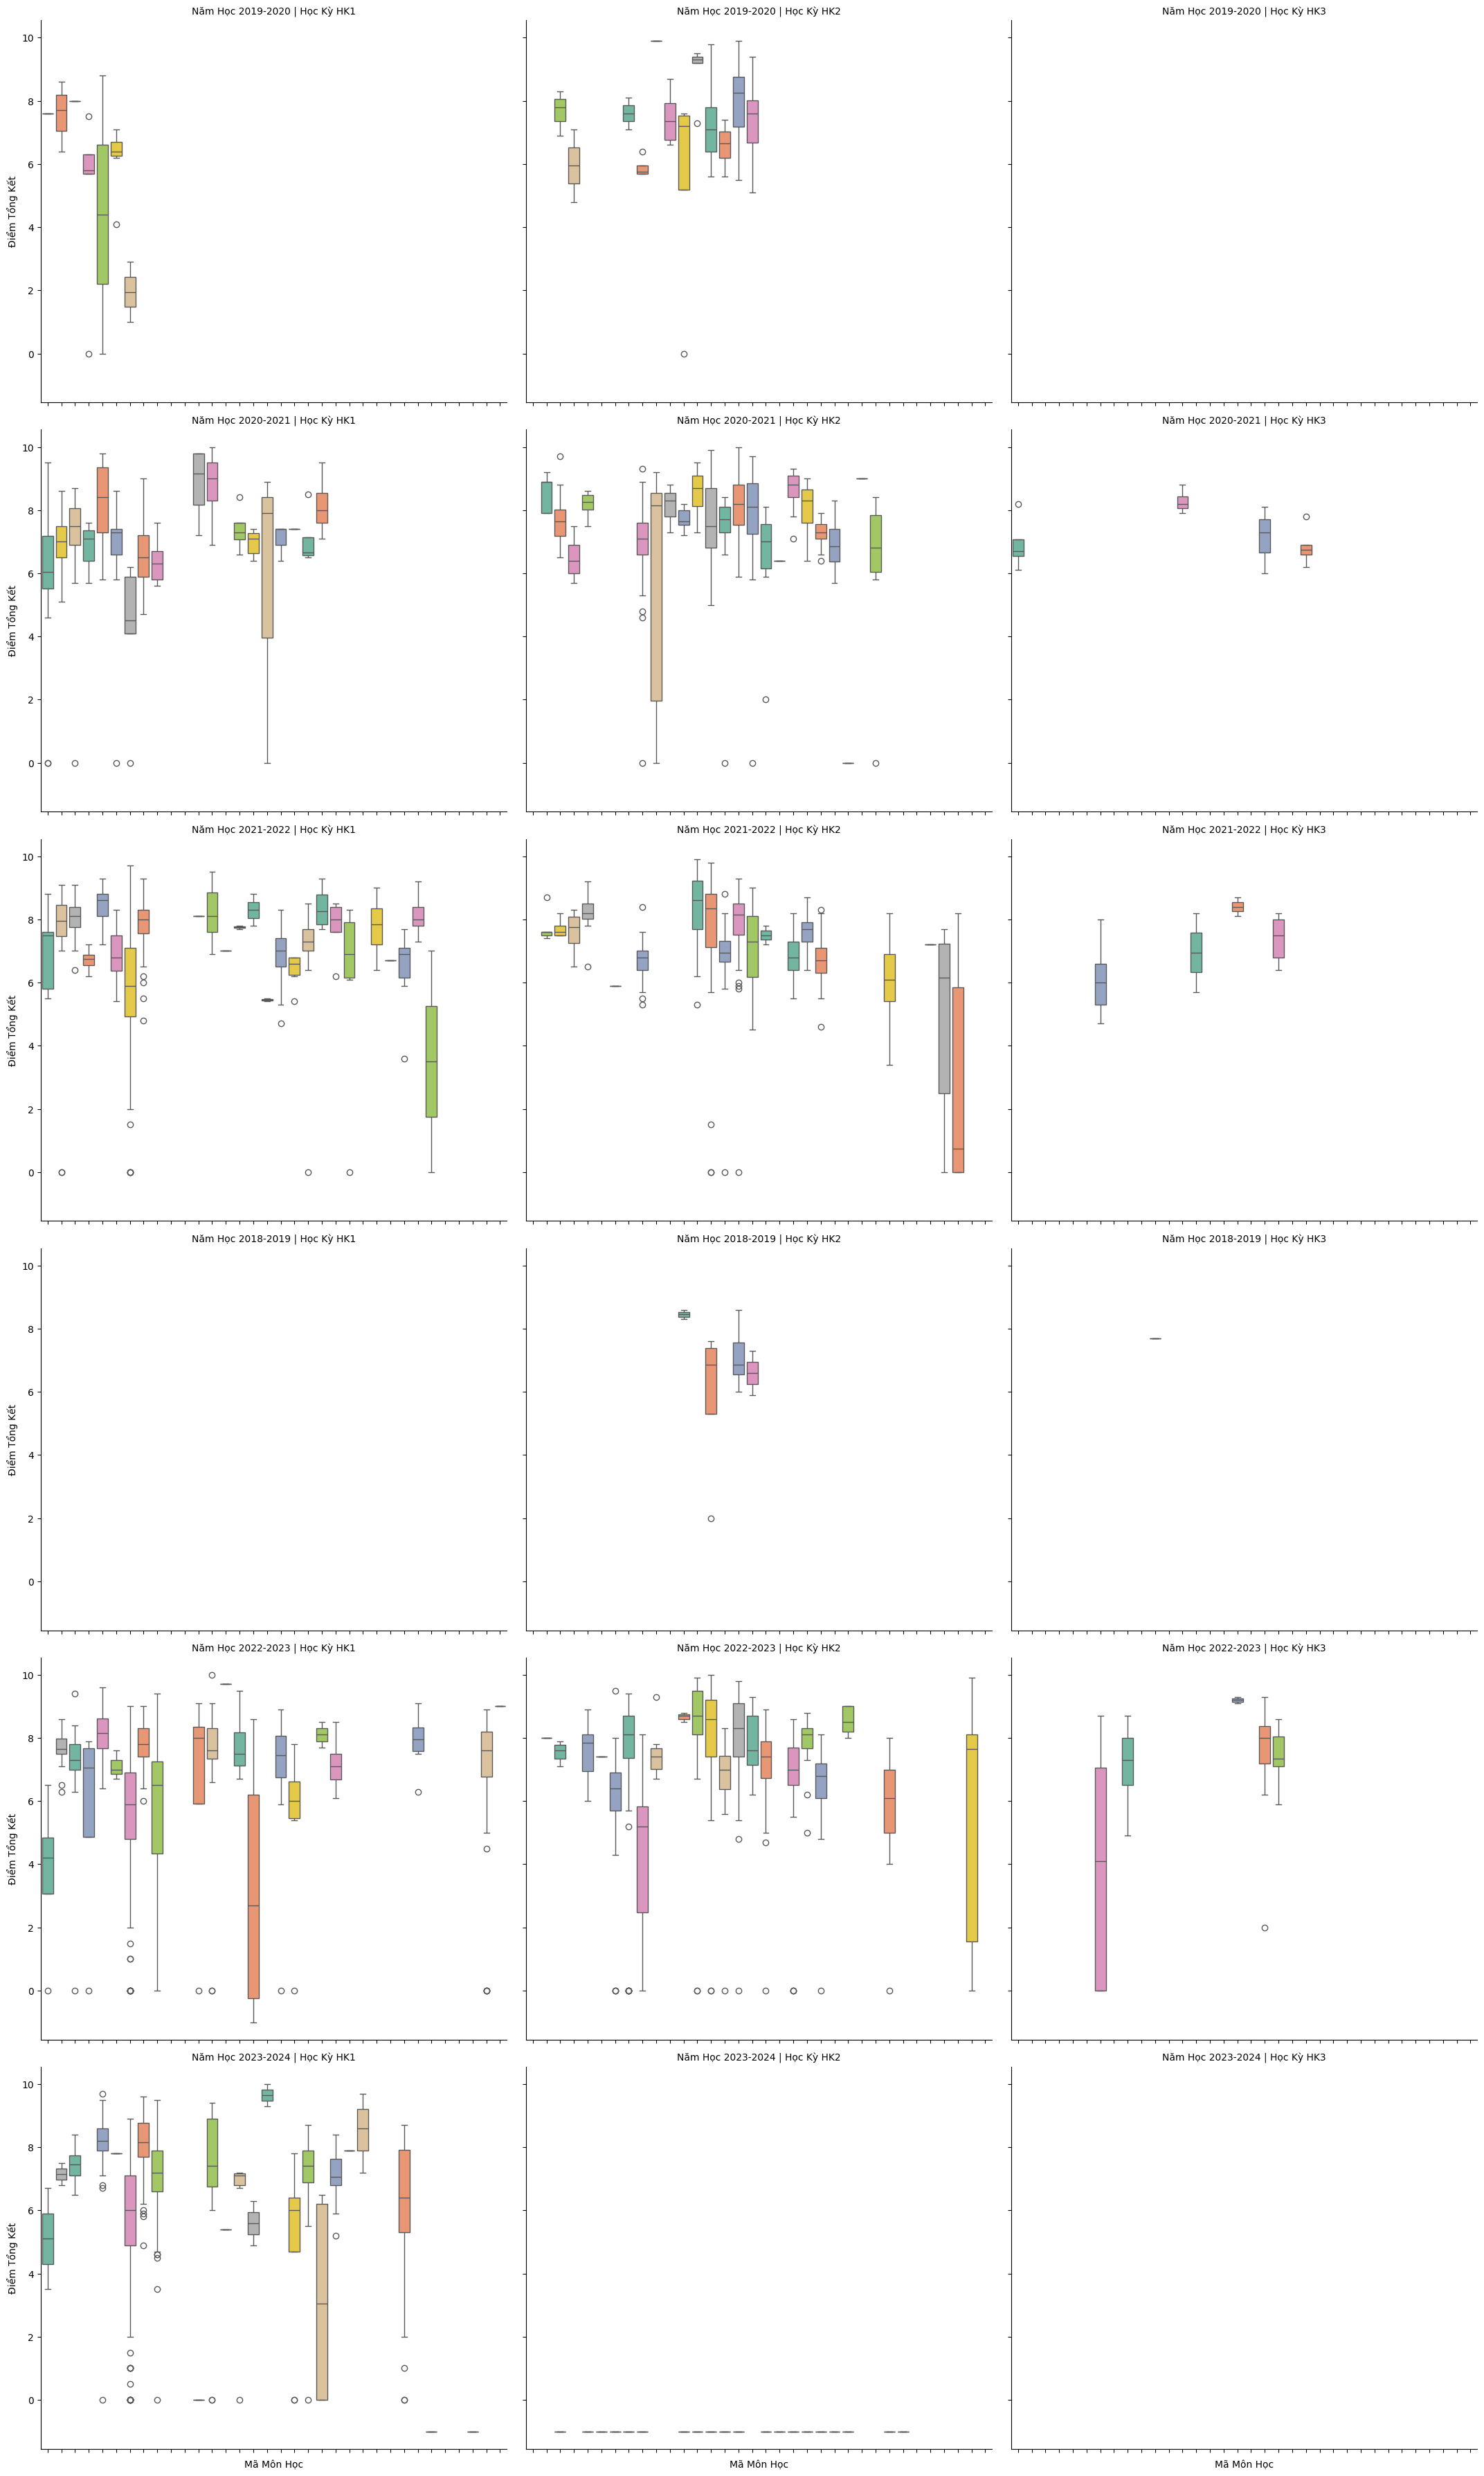

In [ ]:
g = sns.FacetGrid(df_Dulieu0205, row='NamHoc', col='HocKy', height=6, aspect=1.2, sharex=True, sharey=True)

# Vẽ box plot với Seaborn
g.map_dataframe(sns.boxplot, x='MaMonHoc', y='DiemTongKet', palette='Set2')

# Thiết lập các nhãn và tiêu đề
g.set_axis_labels('Mã Môn Học', 'Điểm Tổng Kết')
g.set_titles(row_template='Năm Học {row_name}', col_template='Học Kỳ {col_name}')
g.set_xticklabels(rotation=90)

# Hiển thị biểu đồ
plt.show()

In [ ]:
print(df_DS_mon_TC[['MaMonHoc', 'Tên Môn']])

0  MaMonHoc                                       Tên Môn
1    003240             Hàm phức và phép biến đổi Laplace
2    003395                                     Logic học
3    003320                              Phương pháp tính
4    003193                                 Toán ứng dụng
5    003345                              Vật lý đại cương
6    003196                          Giao tiếp kinh doanh
7    003285                                Kế toán cơ bản
8    003197                     Kỹ năng xây dựng kế hoạch
9    003206                       Môi trường và con người
10   003205                         Quản trị doanh nghiệp
11   003217                                  Quản trị học
12   003203           Âm nhạc – Nhạc lý và Guitar căn bản
13   003554                Cấu trúc dữ liệu và giải thuật
14   000901                              Cấu trúc rời rạc
15   010665                        Cơ sở văn hóa Việt Nam
16   003194                                       Hội họa
17   002031   

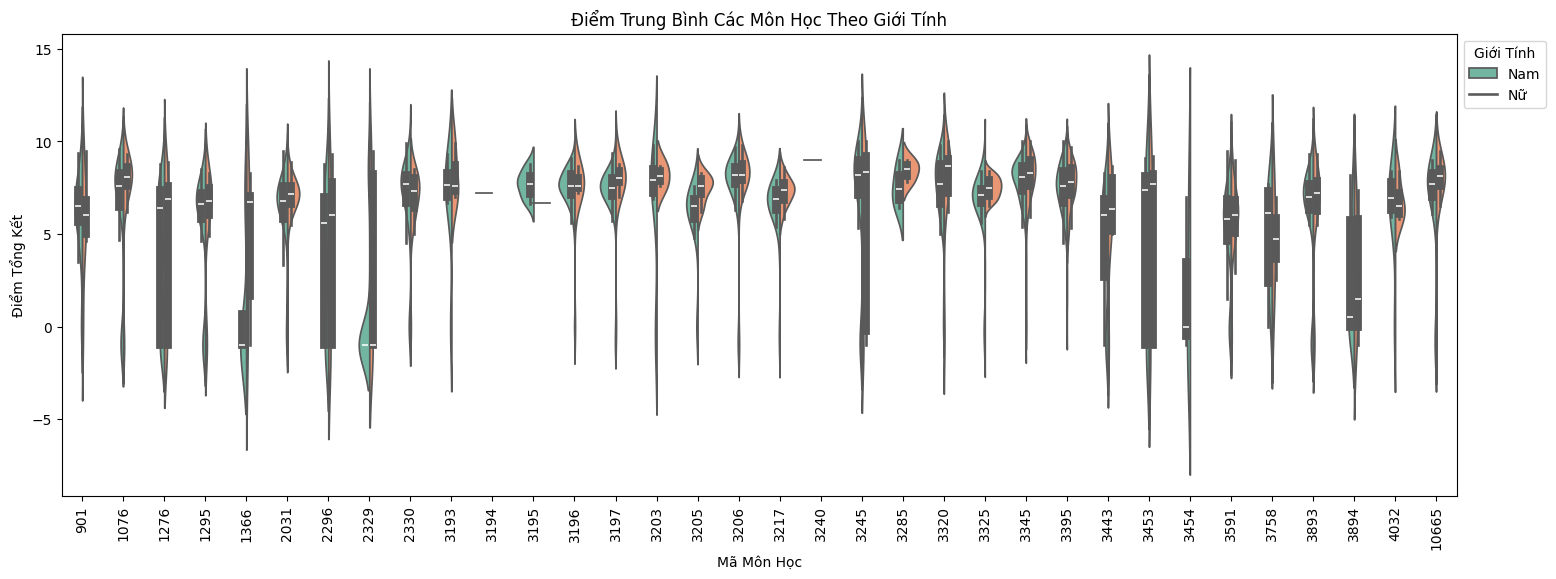

In [ ]:
plt.figure(figsize=(18, 6))
sns.violinplot(data=df_Dulieu0205, x='MaMonHoc', y='DiemTongKet', hue='GioiTinh', split=True, palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Mã Môn Học')
plt.ylabel('Điểm Tổng Kết')
plt.title('Điểm Trung Bình Các Môn Học Theo Giới Tính')
plt.legend(title='Giới Tính', loc='upper left', bbox_to_anchor=(1, 1), labels=['Nam', 'Nữ'])
plt.show()

In [ ]:
df_Dulieu0205.head()

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,TenDot,DiemTongKet,Thuộc KCNTT,HocKy,NamHoc
0,1,25933,1677250,3197,HK1 (2019-2020),8.0,0,HK1,2019-2020
1,1,25933,1677250,3203,HK2 (2019-2020),7.6,0,HK2,2019-2020
2,1,25933,1677250,3395,HK1 (2020-2021),8.9,0,HK1,2020-2021
3,1,25933,1677250,1076,HK1 (2020-2021),7.9,1,HK1,2020-2021
4,1,25933,1677250,901,HK1 (2020-2021),9.5,1,HK1,2020-2021


In [ ]:
def convert_hocky(hocky):
    return int(hocky.replace("HK", ""))

df_Dulieu0205['HocKy'] = df_Dulieu0205['HocKy'].apply(convert_hocky)

In [ ]:
df_Dulieu0205.head()

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,TenDot,DiemTongKet,Thuộc KCNTT,HocKy,NamHoc
0,1,25933,1677250,3197,HK1 (2019-2020),8.0,0,1,2019-2020
1,1,25933,1677250,3203,HK2 (2019-2020),7.6,0,2,2019-2020
2,1,25933,1677250,3395,HK1 (2020-2021),8.9,0,1,2020-2021
3,1,25933,1677250,1076,HK1 (2020-2021),7.9,1,1,2020-2021
4,1,25933,1677250,901,HK1 (2020-2021),9.5,1,1,2020-2021


###DECISION TREE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.root = None

    def _mse(self, y):
        return np.mean((y - np.mean(y)) ** 2)

    def _split(self, X, y, feature, threshold):
        left_mask = X[:, feature] < threshold
        right_mask = ~left_mask
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    def _best_split(self, X, y):
        best_mse = float('inf')
        best_feature, best_threshold = None, None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)

                if len(y_left) < self.min_samples_leaf or len(y_right) < self.min_samples_leaf:
                    continue

                mse_left, mse_right = self._mse(y_left), self._mse(y_right)
                mse = (len(y_left) * mse_left + len(y_right) * mse_right) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        if len(y) <= self.min_samples_split or depth == self.max_depth or self._mse(y) == 0:
            return Node(value=np.mean(y))

        feature, threshold = self._best_split(X, y)

        if feature is None:
            return Node(value=np.mean(y))

        X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)

        if len(y_left) == 0 or len(y_right) == 0:
            return Node(value=np.mean(y))

        left_child = self._build_tree(X_left, y_left, depth + 1)
        right_child = self._build_tree(X_right, y_right, depth + 1)

        return Node(feature=feature, threshold=threshold, left=left_child, right=right_child)

    def fit(self, X, y):
        self.root = self._build_tree(np.array(X), np.array(y))

    def _predict(self, x, tree):
        if tree.value is not None:
            return tree.value
        if x[tree.feature] < tree.threshold:
            return self._predict(x, tree.left)
        else:
            return self._predict(x, tree.right)

    def predict(self, X):
        return np.array([self._predict(x, self.root) for x in np.array(X)])

# Chuẩn bị dữ liệu
X = df_Dulieu0205[['IDSinhVien', 'MaMonHoc', 'HocKy', 'NamHoc']]
y = df_Dulieu0205['DiemTongKet']

# One-hot encoding cho các biến phân loại
X = pd.get_dummies(X, columns=['HocKy', 'NamHoc'])

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình DecisionTreeRegressor
custom_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5)
custom_tree.fit(X_train, y_train)

# Dự đoán điểm số cho học kỳ tiếp theo
y_pred = custom_tree.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Custom Decision Tree Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Lưu mô hình nếu đạt yêu cầu
joblib.dump(custom_tree, 'best_custom_decision_tree_model.pkl')
print("Mô hình đã được lưu lại với tên 'best_custom_decision_tree_model.pkl'.")




Custom Decision Tree Regressor:
Mean Squared Error: 2.8531691642077157
R-squared: 0.7353301498394348
Mô hình đã được lưu lại với tên 'best_custom_decision_tree_model.pkl'.


1.Lấy dữ liệu của sinh viên: Tìm tất cả các môn học mà sinh viên đã học cùng với học kỳ và năm học.
2.Xác định các môn chưa học: Lọc ra những môn chưa học từ danh sách tất cả các môn học.
3.Tạo dữ liệu dự đoán: Với từng môn chưa học, giả định sinh viên sẽ học môn đó ở học kỳ tiếp theo, sau đó sử dụng mô hình đã huấn luyện để dự đoán điểm.
4.Dự đoán và chọn môn học có xác suất cao nhất: Chọn môn học với điểm số dự đoán cao nhất (môn học mà mô hình đánh giá là có xác suất học tiếp theo cao nhất).

In [ ]:
def du_doan_mon_tiep_theo(df_Dulieu0205, custom_tree):
    # Cho phép người dùng nhập vào mã sinh viên
    sinhvien_id = int(input("Nhập mã sinh viên: "))

    # Bước 1: Lọc dữ liệu của sinh viên dựa vào IDSinhVien
    data_sinhvien = df_Dulieu0205[df_Dulieu0205['IDSinhVien'] == sinhvien_id]

    if data_sinhvien.empty:
        print(f"Không tìm thấy dữ liệu cho sinh viên với ID: {sinhvien_id}")
        return

    # Lấy danh sách các mã môn học mà sinh viên đã học
    monhoc_da_hoc = data_sinhvien['MaMonHoc'].unique()

    # Tìm các mã môn học mà sinh viên chưa học
    tatca_monhoc = df_Dulieu0205['MaMonHoc'].unique()
    monhoc_chua_hoc = [monhoc for monhoc in tatca_monhoc if monhoc not in monhoc_da_hoc]

    # Bước 2: Chuẩn bị dữ liệu để dự đoán cho các môn chưa học
    du_lieu_du_doan = []
    hoc_ky_tiep_theo = data_sinhvien['HocKy'].max() + 1  # giả sử học kỳ tiếp theo
    nam_hoc_tiep_theo = data_sinhvien['NamHoc'].max()  # giữ nguyên năm học

    for mon in monhoc_chua_hoc:
        # Tạo dữ liệu mới cho từng môn chưa học
        du_lieu_du_doan.append({
            'IDSinhVien': sinhvien_id,
            'MaMonHoc': mon,
            'HocKy': hoc_ky_tiep_theo,
            'NamHoc': nam_hoc_tiep_theo
        })

    # Chuyển thành DataFrame
    df_du_lieu_du_doan = pd.DataFrame(du_lieu_du_doan)

    # One-hot encoding cho các biến phân loại (phải giống với quá trình huấn luyện)
    df_du_lieu_du_doan_encoded = pd.get_dummies(df_du_lieu_du_doan, columns=['HocKy', 'NamHoc', 'MaMonHoc'])

    # Đảm bảo các cột khớp nhau giữa dữ liệu huấn luyện và dữ liệu dự đoán
    missing_cols = set(X_train.columns) - set(df_du_lieu_du_doan_encoded.columns)
    for col in missing_cols:
        df_du_lieu_du_doan_encoded[col] = 0

    df_du_lieu_du_doan_encoded = df_du_lieu_du_doan_encoded[X_train.columns]  # đảm bảo thứ tự cột

    # Bước 3: Dự đoán điểm cho từng môn chưa học
    y_pred_du_doan = custom_tree.predict(df_du_lieu_du_doan_encoded)

    # Bước 4: Tìm mã môn học có điểm số dự đoán cao nhất
    monhoc_du_doan_tot_nhat = monhoc_chua_hoc[np.argmax(y_pred_du_doan)]
    diem_du_doan_cao_nhat = np.max(y_pred_du_doan)

    print(f"Môn học tiếp theo có xác suất cao nhất: {monhoc_du_doan_tot_nhat}")
    print(f"Điểm dự đoán cho môn học {monhoc_du_doan_tot_nhat}: {diem_du_doan_cao_nhat}")

# Gọi hàm để thực hiện dự đoán với mã sinh viên nhập vào
du_doan_mon_tiep_theo(df_Dulieu0205, custom_tree)


Nhập mã sinh viên: 1680752
Môn học tiếp theo có xác suất cao nhất: 3197
Điểm dự đoán cho môn học 3197: 6.016666666666667


###CNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Define the CNN model for score prediction
class AdvancedCNNModel(nn.Module):
    def __init__(self):
        super(AdvancedCNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=256, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.flatten = nn.Flatten()

        # Calculate flattened size after convolution
        with torch.no_grad():
            sample_input = torch.zeros(1, 1, X_train.shape[2])
            sample_output = self._forward_features(sample_input)
            flattened_size = sample_output.view(1, -1).size(1)

        self.fc1 = nn.Linear(flattened_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.4)
        self.fc3 = nn.Linear(64, 1)

    def _forward_features(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = self.bn1(x)
        return x

    def forward(self, x):
        x = self._forward_features(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Define a simple feedforward neural network for subject prediction
# Define a simple feedforward neural network for subject prediction
class SubjectNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SubjectNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate models
#cnn_model = AdvancedCNNModel()
#subject_model = SubjectNN(input_dim=X_train.shape[2], num_classes=len(y_subject.unique())) # Change X_train.shape[1] to X_train.shape[2] to get the correct input dimension
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_subject = label_encoder.fit_transform(df_Dulieu0205['MaMonHoc'])
# Feature selection and preprocessing
X = df_Dulieu0205[['IDSinhVien', 'MaMonHoc', 'HocKy', 'NamHoc']]
y_score = df_Dulieu0205['DiemTongKet']
#y_subject = df_Dulieu0205['MaMonHoc']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['HocKy', 'NamHoc'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_score_tensor = torch.tensor(y_score.values, dtype=torch.float32).view(-1, 1)
y_subject_tensor = torch.tensor(y_subject, dtype=torch.long)  # Classification target # Removed .values
# Reshape X to add a channel dimension
X_tensor = X_tensor.unsqueeze(1)

# Split into train and test sets
X_train, X_test, y_score_train, y_score_test, y_subject_train, y_subject_test = train_test_split(
    X_tensor, y_score_tensor, y_subject_tensor, test_size=0.2, random_state=42)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_score_train, y_subject_train)
test_dataset = TensorDataset(X_test, y_score_test, y_subject_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate models
cnn_model = AdvancedCNNModel()
subject_model = SubjectNN(input_dim=X_train.shape[2], num_classes=len(label_encoder.classes_))

# Define loss functions and optimizers
criterion_score = nn.MSELoss()
criterion_subject = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001)
optimizer_subject = optim.Adam(subject_model.parameters(), lr=0.001)

# Scheduler to reduce learning rate over time
scheduler_cnn = optim.lr_scheduler.ReduceLROnPlateau(optimizer_cnn, mode='min', factor=0.5, patience=5, verbose=True)
scheduler_subject = optim.lr_scheduler.ReduceLROnPlateau(optimizer_subject, mode='min', factor=0.5, patience=5, verbose=True)

# Training loop
num_epochs = 100
best_r2 = -float('inf')
best_model_path_cnn = 'best_cnn_model.pth'
best_model_path_subject = 'best_subject_model.pth'

for epoch in range(num_epochs):
    cnn_model.train()
    subject_model.train()
    running_loss_score = 0.0
    running_loss_subject = 0.0
    for X_batch, y_score_batch, y_subject_batch in train_loader:
        optimizer_cnn.zero_grad()
        optimizer_subject.zero_grad()

        # Score prediction
        outputs_score = cnn_model(X_batch)
        loss_score = criterion_score(outputs_score, y_score_batch)
        loss_score.backward()
        optimizer_cnn.step()

        # Subject prediction
        outputs_subject = subject_model(X_batch.squeeze(1))
        loss_subject = criterion_subject(outputs_subject, y_subject_batch)
        loss_subject.backward()
        optimizer_subject.step()

        running_loss_score += loss_score.item() * X_batch.size(0)
        running_loss_subject += loss_subject.item() * X_batch.size(0)

    epoch_loss_score = running_loss_score / len(train_loader.dataset)
    epoch_loss_subject = running_loss_subject / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss (Score): {epoch_loss_score:.4f}, Loss (Subject): {epoch_loss_subject:.4f}')

    # Step the schedulers
    scheduler_cnn.step(epoch_loss_score)
    scheduler_subject.step(epoch_loss_subject)

    # Evaluation on the test set
    cnn_model.eval()
    subject_model.eval()
    y_pred_score = []
    y_pred_subject = []
    y_true_score = []
    y_true_subject = []

    with torch.no_grad():
        for X_batch, y_score_batch, y_subject_batch in test_loader:
            outputs_score = cnn_model(X_batch)
            outputs_subject = subject_model(X_batch.squeeze(1))

            y_pred_score.append(outputs_score.numpy())
            y_pred_subject.append(outputs_subject.numpy())
            y_true_score.append(y_score_batch.numpy())
            y_true_subject.append(y_subject_batch.numpy())

    y_pred_score = torch.cat([torch.tensor(pred) for pred in y_pred_score]).numpy()
    y_pred_subject = torch.cat([torch.tensor(pred) for pred in y_pred_subject]).numpy()
    y_true_score = torch.cat([torch.tensor(pred) for pred in y_true_score]).numpy()
    y_true_subject = torch.cat([torch.tensor(pred) for pred in y_true_subject]).numpy()

    mse_cnn = mean_squared_error(y_true_score, y_pred_score)
    r2_cnn = r2_score(y_true_score, y_pred_score)
    accuracy_subject = accuracy_score(y_true_subject, y_pred_subject.argmax(axis=1))

    print(f'\nEpoch {epoch+1}:')
    print(f'Mean Squared Error (Score): {mse_cnn}')
    print(f'R-squared (Score): {r2_cnn}')
    print(f'Accuracy (Subject): {accuracy_subject}')

    # Check if this is the best model
    if r2_cnn > best_r2:
        best_r2 = r2_cnn
        torch.save(cnn_model.state_dict(), best_model_path_cnn)
        torch.save(subject_model.state_dict(), best_model_path_subject)
        print(f'Saved Best Models with R-squared: {best_r2}')

# Load the best models
cnn_model.load_state_dict(torch.load(best_model_path_cnn))
subject_model.load_state_dict(torch.load(best_model_path_subject))

print(f'Best Model R-squared: {best_r2}')


Epoch 1/100, Loss (Score): 7.7603, Loss (Subject): 2.6898

Epoch 1:
Mean Squared Error (Score): 3.3638081550598145
R-squared (Score): 0.6879615041132001
Accuracy (Subject): 0.44539614561027835
Saved Best Models with R-squared: 0.6879615041132001
Epoch 2/100, Loss (Score): 4.0033, Loss (Subject): 1.7025

Epoch 2:
Mean Squared Error (Score): 3.301267385482788
R-squared (Score): 0.6937630217097239
Accuracy (Subject): 0.5535331905781584
Saved Best Models with R-squared: 0.6937630217097239
Epoch 3/100, Loss (Score): 3.9099, Loss (Subject): 1.3727

Epoch 3:
Mean Squared Error (Score): 3.3045365810394287
R-squared (Score): 0.6934597547489003
Accuracy (Subject): 0.6049250535331906
Epoch 4/100, Loss (Score): 3.7898, Loss (Subject): 1.2059

Epoch 4:
Mean Squared Error (Score): 3.196237325668335
R-squared (Score): 0.703505980674118
Accuracy (Subject): 0.6359743040685225
Saved Best Models with R-squared: 0.703505980674118
Epoch 5/100, Loss (Score): 3.8340, Loss (Subject): 1.1019

Epoch 5:
Mean Squ

In [ ]:
def du_doan_tu_ma_sinh_vien(df, cnn_model, subject_model, scaler, label_encoder):
    # Nhập mã sinh viên
    sinhvien_id = int(input("Nhập mã sinh viên: "))

    # Bước 1: Lọc dữ liệu của sinh viên
    data_sinhvien = df[df['IDSinhVien'] == sinhvien_id]

    if data_sinhvien.empty:
        print(f"Không tìm thấy dữ liệu cho sinh viên với ID: {sinhvien_id}")
        return

    # Lấy danh sách các môn học đã học
    monhoc_da_hoc = data_sinhvien['MaMonHoc'].unique()

    # Tìm các môn học chưa học
    tatca_monhoc = df['MaMonHoc'].unique()
    monhoc_chua_hoc = [monhoc for monhoc in tatca_monhoc if monhoc not in monhoc_da_hoc]

    # Tạo dữ liệu để dự đoán cho các môn chưa học
    du_lieu_du_doan = []
    hoc_ky_tiep_theo = data_sinhvien['HocKy'].max() + 1  # Giả sử học kỳ tiếp theo
    nam_hoc_tiep_theo = data_sinhvien['NamHoc'].max()  # Giữ nguyên năm học

    for mon in monhoc_chua_hoc:
        du_lieu_du_doan.append({
            'IDSinhVien': sinhvien_id,
            'MaMonHoc': mon,
            'HocKy': hoc_ky_tiep_theo,
            'NamHoc': nam_hoc_tiep_theo
        })

    # Chuyển thành DataFrame và chuẩn bị dữ liệu
    df_du_lieu_du_doan = pd.DataFrame(du_lieu_du_doan)
    df_du_lieu_du_doan_encoded = pd.get_dummies(df_du_lieu_du_doan, columns=['HocKy', 'NamHoc'])

    # Đảm bảo các cột khớp nhau
    missing_cols = set(X.columns) - set(df_du_lieu_du_doan_encoded.columns)
    for col in missing_cols:
        df_du_lieu_du_doan_encoded[col] = 0
    df_du_lieu_du_doan_encoded = df_du_lieu_du_doan_encoded[X.columns]

    # Chuẩn hóa dữ liệu
    df_du_lieu_du_doan_encoded_scaled = scaler.transform(df_du_lieu_du_doan_encoded)
    X_du_doan_tensor = torch.tensor(df_du_lieu_du_doan_encoded_scaled, dtype=torch.float32).unsqueeze(1)

    # Dự đoán điểm số
    cnn_model.eval()
    with torch.no_grad():
        y_pred_score = cnn_model(X_du_doan_tensor).numpy().flatten()

    # Dự đoán môn học
    subject_model.eval()
    with torch.no_grad():
        X_du_doan_tensor_class = torch.tensor(df_du_lieu_du_doan_encoded_scaled, dtype=torch.float32)
        y_pred_subject = subject_model(X_du_doan_tensor_class).numpy()

    # Chọn môn học có xác suất cao nhất
    monhoc_chua_hoc_np = np.array(monhoc_chua_hoc)
    # Ensure the index doesn't exceed the bounds of monhoc_chua_hoc_np
    idx_max_subject = np.argmax(y_pred_subject, axis=1) % len(monhoc_chua_hoc_np)
    monhoc_du_doan_tot_nhat = monhoc_chua_hoc_np[idx_max_subject[0]]
    diem_du_doan_cao_nhat = y_pred_score[idx_max_subject[0]]

    print(f"Môn học tiếp theo có xác suất cao nhất: {monhoc_du_doan_tot_nhat}")
    print(f"Điểm dự đoán cho môn học {monhoc_du_doan_tot_nhat}: {diem_du_doan_cao_nhat}")

# Sử dụng hàm dự đoán
du_doan_tu_ma_sinh_vien(df_Dulieu0205, cnn_model, subject_model, scaler, label_encoder)


Nhập mã sinh viên: 1677250
Môn học tiếp theo có xác suất cao nhất: 3345
Điểm dự đoán cho môn học 3345: 5.699158191680908


###LSTM

In [ ]:
# Define the LSTM model for score prediction
class AdvancedLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(AdvancedLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.4)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        x = torch.relu(self.fc1(lstm_out[:, -1, :]))  # Use the output of the last time step
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Define a simple feedforward neural network for subject prediction
class SubjectNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SubjectNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

label_encoder = LabelEncoder()
y_subject = label_encoder.fit_transform(df_Dulieu0205['MaMonHoc'])

# Feature selection and preprocessing
X = df_Dulieu0205[['IDSinhVien', 'MaMonHoc', 'HocKy', 'NamHoc']]
y_score = df_Dulieu0205['DiemTongKet']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['HocKy', 'NamHoc'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_score_tensor = torch.tensor(y_score.values, dtype=torch.float32).view(-1, 1)
y_subject_tensor = torch.tensor(y_subject, dtype=torch.long)

# Reshape X to add a channel dimension (for LSTM, this is typically not needed)
X_tensor = X_tensor.unsqueeze(1)

# Split into train and test sets
X_train, X_test, y_score_train, y_score_test, y_subject_train, y_subject_test = train_test_split(
    X_tensor, y_score_tensor, y_subject_tensor, test_size=0.2, random_state=42)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_score_train, y_subject_train)
test_dataset = TensorDataset(X_test, y_score_test, y_subject_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

losses_score = []
losses_subject = []
r2_scores = []
subject_accuracies = []

# Instantiate models
input_size = X_train.shape[2]
hidden_size = 64
num_layers = 2
lstm_model = AdvancedLSTMModel(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers)
subject_model = SubjectNN(input_dim=X_train.shape[2], num_classes=len(label_encoder.classes_))

# Define loss functions and optimizers
criterion_score = nn.MSELoss()
criterion_subject = nn.CrossEntropyLoss()
optimizer_lstm = optim.Adam(lstm_model.parameters(), lr=0.001)
optimizer_subject = optim.Adam(subject_model.parameters(), lr=0.001)

# Scheduler to reduce learning rate over time
scheduler_lstm = optim.lr_scheduler.ReduceLROnPlateau(optimizer_lstm, mode='min', factor=0.5, patience=5, verbose=True)
scheduler_subject = optim.lr_scheduler.ReduceLROnPlateau(optimizer_subject, mode='min', factor=0.5, patience=5, verbose=True)

# Training loop
num_epochs = 200
best_r2 = -float('inf')
best_model_path_lstm = 'best_lstm_score.pth'
best_model_path_subject = 'best_subject_model.pth'

for epoch in range(num_epochs):
    lstm_model.train()
    subject_model.train()
    running_loss_score = 0.0
    running_loss_subject = 0.0
    for X_batch, y_score_batch, y_subject_batch in train_loader:
        optimizer_lstm.zero_grad()
        optimizer_subject.zero_grad()

        # Score prediction
        outputs_score = lstm_model(X_batch)
        loss_score = criterion_score(outputs_score, y_score_batch)
        loss_score.backward()
        optimizer_lstm.step()

        # Subject prediction
        outputs_subject = subject_model(X_batch.squeeze(1))
        loss_subject = criterion_subject(outputs_subject, y_subject_batch)
        loss_subject.backward()
        optimizer_subject.step()

        running_loss_score += loss_score.item() * X_batch.size(0)
        running_loss_subject += loss_subject.item() * X_batch.size(0)

    epoch_loss_score = running_loss_score / len(train_loader.dataset)
    epoch_loss_subject = running_loss_subject / len(train_loader.dataset)

    # Append the losses for plotting
    losses_score.append(epoch_loss_score)
    losses_subject.append(epoch_loss_subject)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss (Score): {epoch_loss_score:.4f}, Loss (Subject): {epoch_loss_subject:.4f}')

    # Step the schedulers
    scheduler_lstm.step(epoch_loss_score)
    scheduler_subject.step(epoch_loss_subject)

    # Evaluation on the test set
    lstm_model.eval()
    subject_model.eval()
    y_pred_score = []
    y_pred_subject = []
    y_true_score = []
    y_true_subject = []

    with torch.no_grad():
        for X_batch, y_score_batch, y_subject_batch in test_loader:
            outputs_score = lstm_model(X_batch)
            outputs_subject = subject_model(X_batch.squeeze(1))

            y_pred_score.append(outputs_score.numpy())
            y_pred_subject.append(outputs_subject.numpy())
            y_true_score.append(y_score_batch.numpy())
            y_true_subject.append(y_subject_batch.numpy())

    y_pred_score = torch.cat([torch.tensor(pred) for pred in y_pred_score]).numpy()
    y_pred_subject = torch.cat([torch.tensor(pred) for pred in y_pred_subject]).numpy()
    y_true_score = torch.cat([torch.tensor(pred) for pred in y_true_score]).numpy()
    y_true_subject = torch.cat([torch.tensor(pred) for pred in y_true_subject]).numpy()

    mse_lstm = mean_squared_error(y_true_score, y_pred_score)
    r2_lstm = r2_score(y_true_score, y_pred_score)
    accuracy_subject = accuracy_score(y_true_subject, y_pred_subject.argmax(axis=1))

    # Append the r2 and accuracy scores for plotting
    r2_scores.append(r2_lstm)
    subject_accuracies.append(accuracy_subject)

    print(f'\nEpoch {epoch+1}:')
    print(f'Mean Squared Error (Score): {mse_lstm}')
    print(f'R-squared (Score): {r2_lstm}')
    print(f'Accuracy (Subject): {accuracy_subject}')

    # Check if this is the best model
    if r2_lstm > best_r2:
        best_r2 = r2_lstm
        torch.save(lstm_model.state_dict(), best_model_path_lstm)
        torch.save(subject_model.state_dict(), best_model_path_subject)
        print(f'Saved Best Models with R-squared: {best_r2}')

# Load the best models
lstm_model.load_state_dict(torch.load(best_model_path_lstm))
subject_model.load_state_dict(torch.load(best_model_path_subject))

print(f'Best Model R-squared: {best_r2}')

Epoch 1/200, Loss (Score): 22.1345, Loss (Subject): 2.7201

Epoch 1:
Mean Squared Error (Score): 4.9265899658203125
R-squared (Score): 0.5429924586257661
Accuracy (Subject): 0.4625267665952891
Saved Best Models with R-squared: 0.5429924586257661
Epoch 2/200, Loss (Score): 5.2712, Loss (Subject): 1.7116

Epoch 2:
Mean Squared Error (Score): 3.407144069671631
R-squared (Score): 0.6839415517107831
Accuracy (Subject): 0.5535331905781584
Saved Best Models with R-squared: 0.6839415517107831
Epoch 3/200, Loss (Score): 4.5888, Loss (Subject): 1.3669

Epoch 3:
Mean Squared Error (Score): 3.320016622543335
R-squared (Score): 0.6920237746662457
Accuracy (Subject): 0.5674518201284796
Saved Best Models with R-squared: 0.6920237746662457
Epoch 4/200, Loss (Score): 4.4608, Loss (Subject): 1.1986

Epoch 4:
Mean Squared Error (Score): 3.299808979034424
R-squared (Score): 0.6938983106679277
Accuracy (Subject): 0.6381156316916489
Saved Best Models with R-squared: 0.6938983106679277
Epoch 5/200, Loss (Sco

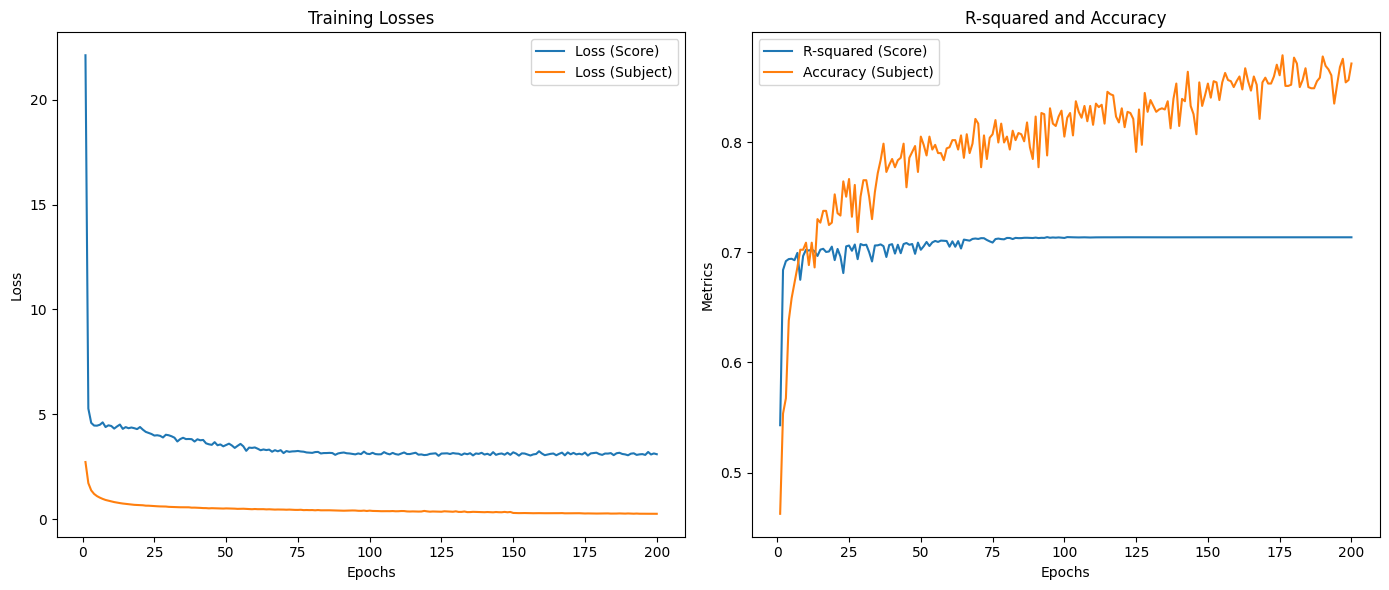

In [ ]:

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(14, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, losses_score, label='Loss (Score)')
plt.plot(epochs, losses_subject, label='Loss (Subject)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()

# Plot R-squared and Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, r2_scores, label='R-squared (Score)')
plt.plot(epochs, subject_accuracies, label='Accuracy (Subject)')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('R-squared and Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Transformer

In [ ]:
class AdvancedTransformerModel(nn.Module):
    def __init__(self, input_dim, num_heads, num_layers, hidden_dim):
        super(AdvancedTransformerModel, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=input_dim, nhead=num_heads, dim_feedforward=hidden_dim)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.4)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.transformer_encoder(x)
        x = torch.relu(self.fc1(x[:, -1, :]))  # Use the output of the last time step
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Define a simple feedforward neural network for subject prediction
class SubjectNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SubjectNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load and preprocess data
label_encoder = LabelEncoder()
y_subject = label_encoder.fit_transform(df_Dulieu0205['MaMonHoc'])

# Feature selection and preprocessing
X = df_Dulieu0205[['IDSinhVien', 'MaMonHoc', 'HocKy', 'NamHoc']]
y_score = df_Dulieu0205['DiemTongKet']

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['HocKy', 'NamHoc'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_score_tensor = torch.tensor(y_score.values, dtype=torch.float32).view(-1, 1)
y_subject_tensor = torch.tensor(y_subject, dtype=torch.long)

# Reshape X to add a channel dimension (for Transformer)
X_tensor = X_tensor.unsqueeze(1)

# Split into train and test sets
X_train, X_test, y_score_train, y_score_test, y_subject_train, y_subject_test = train_test_split(
    X_tensor, y_score_tensor, y_subject_tensor, test_size=0.2, random_state=42)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_score_train, y_subject_train)
test_dataset = TensorDataset(X_test, y_score_test, y_subject_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

losses_score = []
losses_subject = []
r2_scores = []
subject_accuracies = []

# Instantiate models
input_dim = X_train.shape[2]
num_heads = 11
num_layers = 2
hidden_dim = 128
transformer_model = AdvancedTransformerModel(input_dim=input_dim, num_heads=num_heads, num_layers=num_layers, hidden_dim=hidden_dim)
subject_model = SubjectNN(input_dim=X_train.shape[2], num_classes=len(label_encoder.classes_))

# Define loss functions and optimizers
criterion_score = nn.MSELoss()
criterion_subject = nn.CrossEntropyLoss()
optimizer_transformer = optim.Adam(transformer_model.parameters(), lr=0.001)
optimizer_subject = optim.Adam(subject_model.parameters(), lr=0.001)

# Scheduler to reduce learning rate over time
scheduler_transformer = optim.lr_scheduler.ReduceLROnPlateau(optimizer_transformer, mode='min', factor=0.5, patience=5, verbose=True)
scheduler_subject = optim.lr_scheduler.ReduceLROnPlateau(optimizer_subject, mode='min', factor=0.5, patience=5, verbose=True)

In [ ]:
# Training loop
num_epochs = 200
best_r2 = -float('inf')
best_model_path_transformer = 'best_transformer_model.pth'
best_model_path_subject = 'best_subject_model.pth'

for epoch in range(num_epochs):
    transformer_model.train()
    subject_model.train()
    running_loss_score = 0.0
    running_loss_subject = 0.0
    for X_batch, y_score_batch, y_subject_batch in train_loader:
        optimizer_transformer.zero_grad()
        optimizer_subject.zero_grad()

        # Score prediction
        outputs_score = transformer_model(X_batch)
        loss_score = criterion_score(outputs_score, y_score_batch)
        loss_score.backward()
        optimizer_transformer.step()

        # Subject prediction
        outputs_subject = subject_model(X_batch.squeeze(1))
        loss_subject = criterion_subject(outputs_subject, y_subject_batch)
        loss_subject.backward()
        optimizer_subject.step()

        running_loss_score += loss_score.item() * X_batch.size(0)
        running_loss_subject += loss_subject.item() * X_batch.size(0)

    epoch_loss_score = running_loss_score / len(train_loader.dataset)
    epoch_loss_subject = running_loss_subject / len(train_loader.dataset)

    # Append the losses for plotting
    losses_score.append(epoch_loss_score)
    losses_subject.append(epoch_loss_subject)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss (Score): {epoch_loss_score:.4f}, Loss (Subject): {epoch_loss_subject:.4f}')

    # Step the schedulers
    scheduler_transformer.step(epoch_loss_score)
    scheduler_subject.step(epoch_loss_subject)

    # Evaluation on the test set
    transformer_model.eval()
    subject_model.eval()
    y_pred_score = []
    y_pred_subject = []
    y_true_score = []
    y_true_subject = []

    with torch.no_grad():
        for X_batch, y_score_batch, y_subject_batch in test_loader:
            outputs_score = transformer_model(X_batch)
            outputs_subject = subject_model(X_batch.squeeze(1))

            y_pred_score.append(outputs_score.numpy())
            y_pred_subject.append(outputs_subject.numpy())
            y_true_score.append(y_score_batch.numpy())
            y_true_subject.append(y_subject_batch.numpy())

    y_pred_score = torch.cat([torch.tensor(pred) for pred in y_pred_score]).numpy()
    y_pred_subject = torch.cat([torch.tensor(pred) for pred in y_pred_subject]).numpy()
    y_true_score = torch.cat([torch.tensor(pred) for pred in y_true_score]).numpy()
    y_true_subject = torch.cat([torch.tensor(pred) for pred in y_true_subject]).numpy()

    mse_transformer = mean_squared_error(y_true_score, y_pred_score)
    r2_transformer = r2_score(y_true_score, y_pred_score)
    accuracy_subject = accuracy_score(y_true_subject, y_pred_subject.argmax(axis=1))

    # Append the r2 and accuracy scores for plotting
    r2_scores.append(r2_transformer)
    subject_accuracies.append(accuracy_subject)

    print(f'\nEpoch {epoch+1}:')
    print(f'Mean Squared Error (Score): {mse_transformer}')
    print(f'R-squared (Score): {r2_transformer}')
    print(f'Accuracy (Subject): {accuracy_subject}')

    # Check if this is the best model
    if r2_transformer > best_r2:
        best_r2 = r2_transformer
        torch.save(transformer_model.state_dict(), best_model_path_transformer)
        torch.save(subject_model.state_dict(), best_model_path_subject)
        print(f'Saved Best Models with R-squared: {best_r2}')

# Load the best models
transformer_model.load_state_dict(torch.load(best_model_path_transformer))
subject_model.load_state_dict(torch.load(best_model_path_subject))

print(f'Best Model R-squared: {best_r2}')

Epoch 1/200, Loss (Score): 11.6315, Loss (Subject): 2.7149

Epoch 1:
Mean Squared Error (Score): 3.4729156494140625
R-squared (Score): 0.6778403125634657
Accuracy (Subject): 0.4625267665952891
Saved Best Models with R-squared: 0.6778403125634657
Epoch 2/200, Loss (Score): 3.6520, Loss (Subject): 1.6635

Epoch 2:
Mean Squared Error (Score): 3.371687650680542
R-squared (Score): 0.6872306046610368
Accuracy (Subject): 0.5471092077087795
Saved Best Models with R-squared: 0.6872306046610368
Epoch 3/200, Loss (Score): 3.6066, Loss (Subject): 1.3571

Epoch 3:
Mean Squared Error (Score): 3.2659668922424316
R-squared (Score): 0.6970376124347252
Accuracy (Subject): 0.5770877944325482
Saved Best Models with R-squared: 0.6970376124347252
Epoch 4/200, Loss (Score): 3.6667, Loss (Subject): 1.2111

Epoch 4:
Mean Squared Error (Score): 3.182455539703369
R-squared (Score): 0.7047844286441649
Accuracy (Subject): 0.6113490364025695
Saved Best Models with R-squared: 0.7047844286441649
Epoch 5/200, Loss (Sc

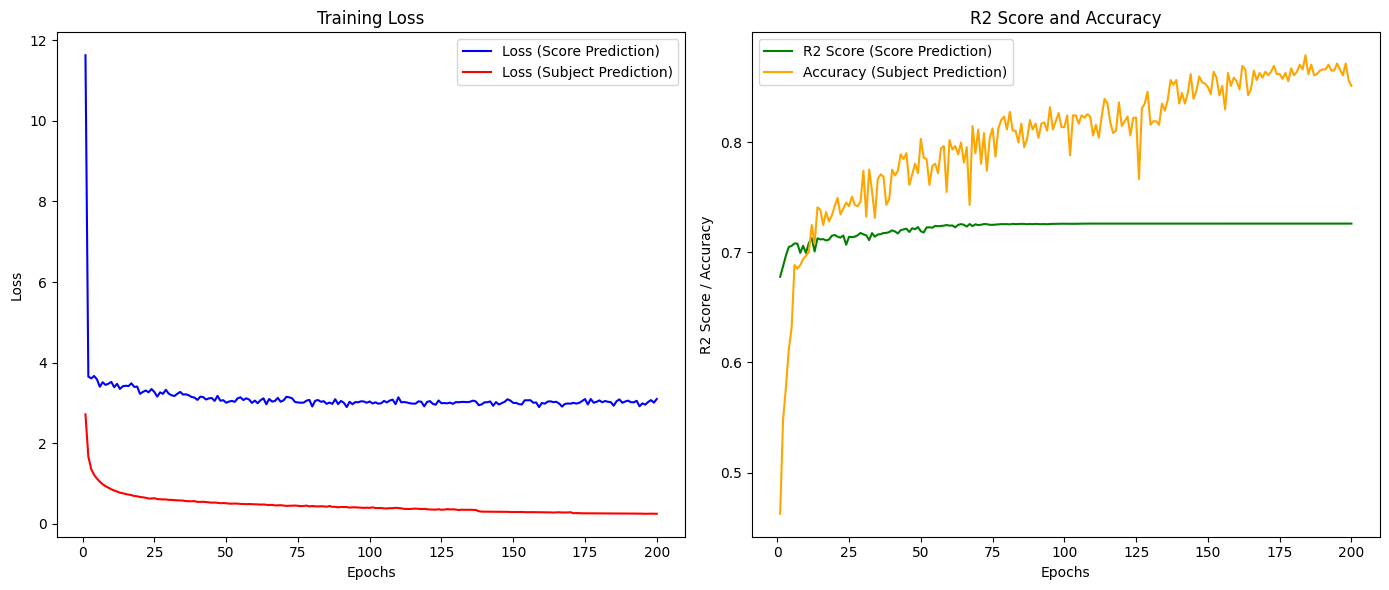

In [ ]:
# Assuming losses_score, losses_subject, r2_scores, and subject_accuracies have been populated during training
epochs = range(1, len(losses_score) + 1)

plt.figure(figsize=(14, 6))

# Plotting the loss for score and subject prediction
plt.subplot(1, 2, 1)
plt.plot(epochs, losses_score, label='Loss (Score Prediction)', color='blue')
plt.plot(epochs, losses_subject, label='Loss (Subject Prediction)', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plotting the R2 score and accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, r2_scores, label='R2 Score (Score Prediction)', color='green')
plt.plot(epochs, subject_accuracies, label='Accuracy (Subject Prediction)', color='orange')
plt.xlabel('Epochs')
plt.ylabel('R2 Score / Accuracy')
plt.title('R2 Score and Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Get the columns after one-hot encoding
X_columns = X.columns

new_data = pd.DataFrame({
    'IDSinhVien': [1678603],
    # 'MaMonHoc': [3205],
    'HocKy': ['HK1'],
    'NamHoc': ['2019-2020']
})

# One-hot encode các cột categorical trong dữ liệu mới
new_data = pd.get_dummies(new_data, columns=['HocKy', 'NamHoc'])

# Reindex dữ liệu mới để có cùng cột với dữ liệu huấn luyện
new_data = new_data.reindex(columns=X_columns, fill_value=0)

# Chuẩn hóa dữ liệu mới sử dụng scaler đã sử dụng trước đó
new_data = scaler.transform(new_data)

# Chuyển đổi dữ liệu mới thành tensor và thêm chiều kênh
new_data = torch.tensor(new_data, dtype=torch.float32).unsqueeze(1)  # Thêm chiều kênh cho Transformer

# Tải mô hình Transformer đã lưu
model = AdvancedTransformerModel(input_dim=new_data.shape[2], num_heads=num_heads, num_layers=num_layers, hidden_dim=hidden_dim)
model.load_state_dict(torch.load('best_transformer_model.pth'))

# Sử dụng mô hình Transformer để dự đoán
model.eval()
with torch.no_grad():
    outputs = model(new_data)
    predicted_class = outputs.argmax(dim=1).item() # Remove this line
    predicted_subject = label_encoder.inverse_transform([predicted_class]) # Remove this line

print(f'\nPredicted subject code with Transformer: {predicted_subject[0]}') # Remove this line
new_data = pd.DataFrame({
    'IDSinhVien': [1678603],
    #'MaMonHoc': [predicted_subject[0]], #3205 # Remove this line
    'HocKy': ['HK1'],
    'NamHoc': ['2019-2020']
})
#real = 6.3

# One-hot encode các cột categorical trong dữ liệu mới
new_data = pd.get_dummies(new_data, columns=['HocKy', 'NamHoc'])

# Reindex dữ liệu mới để có cùng cột với dữ liệu huấn luyện
new_data = new_data.reindex(columns=X_columns, fill_value=0)

new_data = scaler.transform(new_data)

# Chuyển đổi dữ liệu mới thành tensor và thêm chiều kênh
new_data = torch.tensor(new_data, dtype=torch.float32).unsqueeze(1)

# Tải mô hình Transformer đã lưu
model = AdvancedTransformerModel(input_dim=input_dim, num_heads=num_heads, num_layers=num_layers, hidden_dim=hidden_dim)  # Đảm bảo cấu trúc mô hình giống với cấu trúc đã lưu
model.load_state_dict(torch.load('best_transformer_model.pth'))

# Sử dụng mô hình Transformer để dự đoán
model.eval()
with torch.no_grad():
    new_prediction_transformer = model(new_data)

print(f'\nPredicted score with Transformer: {new_prediction_transformer.item()}')


Predicted subject code with Transformer: 901

Predicted score with Transformer: 7.185272216796875


### Random Forest

###Triển khai lên web